In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [0]:
N = 1000
X = np.random.random((N, 2)) *6 - 3 
Y = np.cos(2*X[:,0]) * np.cos(3*X[:,1])


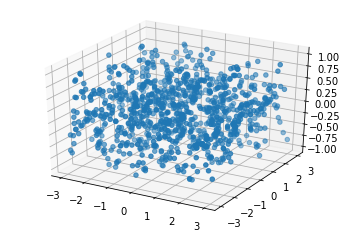

In [0]:
#Plot
fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
#plot.show()

In [0]:
#Build the model
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
        tf.keras.layers.Dense(1)                                    
])

In [0]:
#Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r= model.fit(X,Y, epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2540
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2415
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2443
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2362
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2401
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2367
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2386
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2371
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2306
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2282
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2332
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2330
Epoch 13/100
32/32 [=================

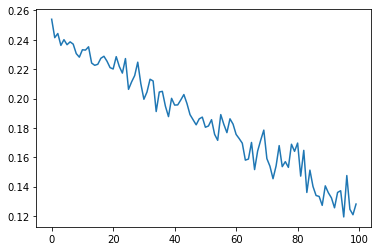

In [0]:
#plot the loss
plt.plot(r.history['loss'], label = 'loss')


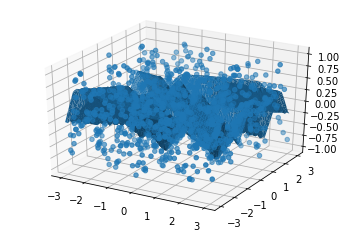

In [0]:
#plot the prediction surface 
fig= plt.figure()
ax= fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
line = np.linspace(-3,3,50)
xx,yy=np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat= model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2, antialiased=True)
plt.show()

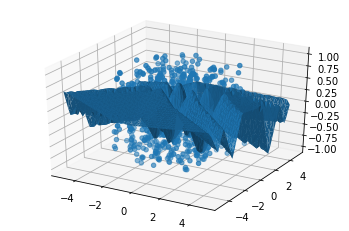

In [0]:
#Can it extrapolate
fig= plt.figure()
ax= fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#surfaceplot
line = np.linspace(-5,5,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2, antialiased=True)
plt.show()